### Loading Dataset

In [1]:
# importing library to import dataset
import pandas as pd  
df=pd.read_csv("housingdata.csv",header=None)

### A glimpse of our dataset

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# A glimpse of characteristics of the attributes of our dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Plotting histogram of our dataset

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24fa95fd50>,
      dtype=object)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df[3]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [6]:
strat_train_set[3].value_counts()

0    376
1     28
Name: 3, dtype: int64

In [7]:
strat_test_set[3].value_counts()

0    95
1     7
Name: 3, dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy="median")
imputer.fit(strat_train_set)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [9]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01, 2.11500e+01])

In [10]:
strat_train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [11]:
df1=strat_train_set

In [12]:
corr_df=df1.corr()
corr_df[13].sort_values(ascending=False)

13    1.000000
5     0.679894
11    0.361761
1     0.339741
7     0.240451
3     0.205066
6    -0.364596
8    -0.374693
0    -0.393715
4    -0.422873
9    -0.456657
2    -0.473516
10   -0.493534
12   -0.740494
Name: 13, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24f5e2e8d0>,
      dtype=object)

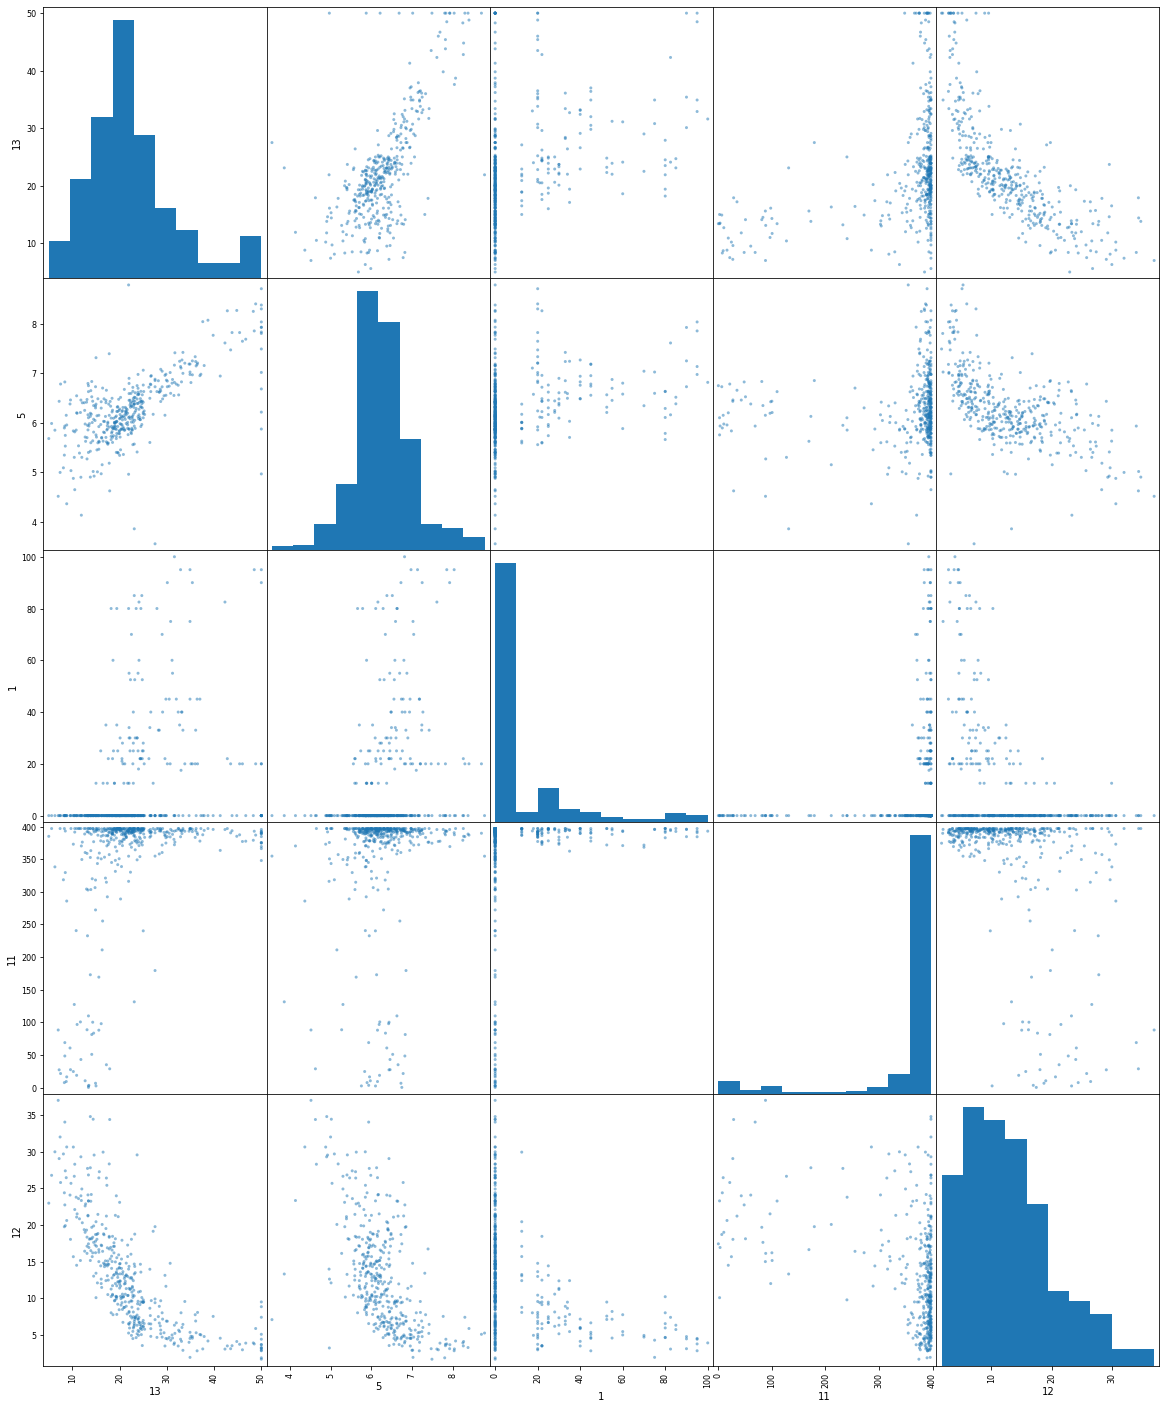

In [13]:
from pandas.plotting import scatter_matrix
attributes=[13,5,1,11,12]
scatter_matrix(df1[attributes],figsize=(20,25))

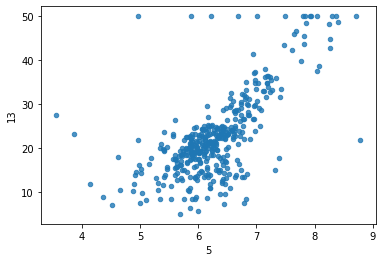

In [14]:
df1.plot(kind="scatter",x=5,y=13,alpha=0.8)

In [15]:
corr_df=df1.corr()
corr_df[13].sort_values(ascending=False)

13    1.000000
5     0.679894
11    0.361761
1     0.339741
7     0.240451
3     0.205066
6    -0.364596
8    -0.374693
0    -0.393715
4    -0.422873
9    -0.456657
2    -0.473516
10   -0.493534
12   -0.740494
Name: 13, dtype: float64

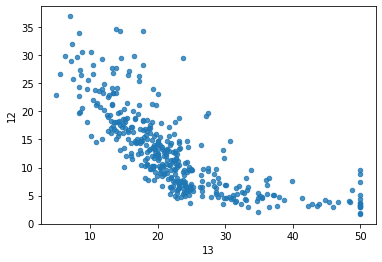

In [16]:
df1.plot(kind="scatter",x=13,y=12,alpha=0.8)

## Sci-kit learn design

####  create pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])

In [18]:
df_std=pd.DataFrame(my_pipeline.fit_transform(df1))

In [19]:
df_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.439420,3.126282,-1.121650,-0.272888,-1.422627,-0.241410,-1.312388,2.611114,-1.001686,-0.577819,-0.974918,0.411642,-0.860910,-0.065011
1,-0.443522,3.126282,-1.358938,-0.272888,-1.054257,0.498654,-1.393881,2.193123,-0.657667,-0.785579,-0.692779,0.391319,-0.941167,0.212355
2,0.156823,-0.489831,0.983368,-0.272888,0.479194,0.286605,0.870210,-0.687307,1.635794,1.505715,0.811966,0.446243,0.814802,-0.619742
3,-0.422929,-0.489831,-0.577199,-0.272888,-0.557384,0.134941,-0.522259,0.378825,-0.542994,-0.744027,0.529827,0.453435,-0.819398,0.063004
4,-0.407863,-0.489831,-0.577199,-0.272888,-0.557384,0.045066,-1.422226,0.796434,-0.542994,-0.744027,0.529827,0.453435,-0.919028,0.052336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.008382,-0.489831,1.198819,3.664502,2.680852,-0.179621,0.480460,-0.954329,-0.542994,-0.055452,-1.774314,-2.765837,0.308352,-0.737089
400,0.426191,-0.489831,0.983368,-0.272888,0.479194,-0.248432,0.569040,-0.822535,1.635794,1.505715,0.811966,-3.656820,1.452707,-0.971783
401,-0.435257,-0.489831,-1.230832,-0.272888,-0.968589,2.162745,-1.138772,-0.119730,-0.887013,-0.809323,-0.222546,0.418312,-1.276033,2.271261
402,0.142107,-0.489831,0.983368,-0.272888,1.327303,0.344181,0.618644,-0.625059,1.635794,1.505715,0.811966,-3.152392,0.738696,-0.897108


#### Choosing Desired Model

In [20]:
X=df_std.iloc[:,:13]
y=strat_train_set.iloc[:,13]

###  Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.metrics import mean_squared_error
ypr=pd.DataFrame(model.predict(X))
mse=mean_squared_error(y,ypr)

In [24]:
import numpy as np
rmse=np.sqrt(mse)
rmse

4.829321492635759

In [25]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=10)
mse=-scores
rmse=np.sqrt(mse)
rmse

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [26]:
def print_scores(scores):
    print("Scores:",scores)
    print("mean:",scores.mean())
    print("Standard Deviation",scores.std()) 

In [27]:
print_scores(rmse)

Scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
mean: 5.030437102767305
Standard Deviation 1.0607661158294843


### Result for test_data(Linear Regression)

In [28]:
df2=strat_test_set
df_t=pd.DataFrame(my_pipeline.fit_transform(df2))
X=df_t.iloc[:,:13]
y=strat_test_set.iloc[:,13]
ypr=pd.DataFrame(model.predict(X))
mse=mean_squared_error(y,ypr)
rmse=np.sqrt(mse)
rmse

4.228239754541729

### Decision Tree Regression

In [29]:
X=df_std.iloc[:,:13]
y=strat_train_set.iloc[:,13]
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
from sklearn.metrics import mean_squared_error
ypr=pd.DataFrame(model.predict(X))
mse=mean_squared_error(y,ypr)

In [31]:
mse

0.0

### Result for test_data (Using DecisionTreeRegressor)

In [32]:
df2=strat_test_set
df_t=pd.DataFrame(my_pipeline.fit_transform(df2))
X=df_t.iloc[:,:13]
y=strat_test_set.iloc[:,13]
ypr=pd.DataFrame(model.predict(X))
mse=mean_squared_error(y,ypr)
rmse=np.sqrt(mse)
rmse

4.52775752832394

In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores=cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=10)
mse=-scores
rmse=np.sqrt(mse)
rmse

array([5.20960651, 4.21178002, 8.3582893 , 8.60499855, 3.60027777,
       3.98409337, 7.46183624, 4.31786985, 3.45716647, 7.07156277])

In [34]:
print_scores(rmse)

Scores: [5.20960651 4.21178002 8.3582893  8.60499855 3.60027777 3.98409337
 7.46183624 4.31786985 3.45716647 7.07156277]
mean: 5.627748083265574
Standard Deviation 1.9284088265224617


### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=20)
model.fit(X,y)
ypr=pd.DataFrame(model.predict(X))
mse=mean_squared_error(y,ypr)
rmse=np.sqrt(mse)

In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores=cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=10)
mse=-scores
rmse=np.sqrt(mse)
rmse

array([3.94750439, 4.39613053, 5.46501464, 5.40345167, 2.53711155,
       5.42819929, 5.31175865, 4.11066479, 2.8647753 , 4.54699241])

In [37]:
print_scores(rmse)

Scores: [3.94750439 4.39613053 5.46501464 5.40345167 2.53711155 5.42819929
 5.31175865 4.11066479 2.8647753  4.54699241]
mean: 4.401160321825763
Standard Deviation 1.0083160596420186


### Result for test data (Using RandomForestRegressor)

In [38]:
df2=strat_test_set
df_t=pd.DataFrame(my_pipeline.fit_transform(df2))
X=df_t.iloc[:,:13]
y=strat_test_set.iloc[:,13]
ypr=pd.DataFrame(model.predict(X))
mse=mean_squared_error(y,ypr)
rmse=np.sqrt(mse)
rmse

1.8572258856143693